In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("supermarket_sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  Rating         1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


#### Question 1: Example

In [3]:
### how many purchases (rows in the table, not 'Quantity') were done by Male and Female customers?

#### Question 1 - solution: Example

In [4]:
m_amount = len(df[df['Gender'] == 'Male'])
f_amount = len(df[df['Gender'] == 'Female'])

# do not print any intermediate results
# print *only your final* result in the form of a data frame (for clarity)

result = [('purchases by male', m_amount), ('purchases by female', f_amount)]
pd.DataFrame(result)

,0,1
0,purchases by male,498
1,purchases by female,502


#### Question 2

In [5]:
### what is the average Rating for products in the "Home and lifestyle" Product line?
home_lifestyle = df[df['Product line'] == 'Home and lifestyle']
home_lifestyle_avg_rating = home_lifestyle['Rating'].mean()

q2_result = [('home and lifestyle average rating', home_lifestyle_avg_rating)]
pd.DataFrame(q2_result)

,0,1
0,home and lifestyle average rating,6.8375


#### Question 3

In [6]:
### how many products in each Product line were sold during the first week (days 1-7 including) of February 2019?
### use the 'Quantity' column for that purpose - the number of products purchased

# Filter data for the first week of February 2019
products_sold_in_first_week_of_feb = df[df['Date'].isin(['02/01/2019', '02/02/2019', '02/03/2019', '02/04/2019', '02/05/2019', '02/06/2019', '02/07/2019'])]

# Group by Product line and sum the Quantity
q3_result = products_sold_in_first_week_of_feb.groupby('Product line')['Quantity'].sum().reset_index()
pd.DataFrame(q3_result)


,Product line,Quantity
0,Electronic accessories,92
1,Fashion accessories,67
2,Food and beverages,132
3,Health and beauty,78
4,Home and lifestyle,87
5,Sports and travel,54


#### Question 4

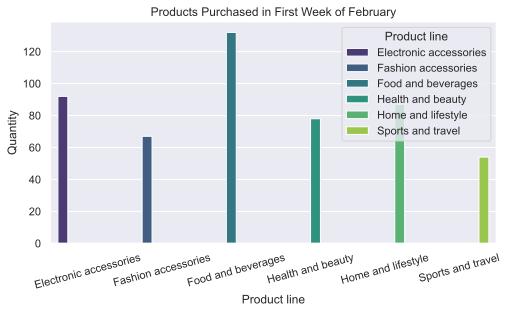

In [7]:
### plot a bar chart showing the number of products per category computed in the previous question

# Create a bar chart for the number of products per Product line
ax = sns.barplot(data=q3_result, x='Product line', y='Quantity', palette='viridis', hue='Product line')
ax.set_xticks(range(len(ax.get_xticks())))
plt.title('Products Purchased in First Week of February')
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)
plt.show()

#### Question 5

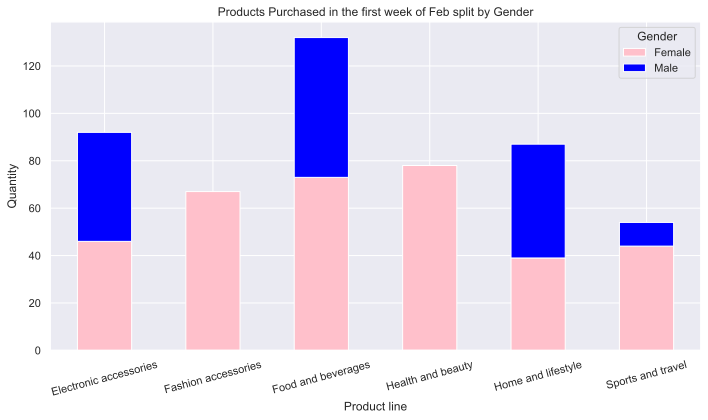

In [8]:
### plot the same bar chart as above - split by gender (male, female)
### the split bar chart is called stacked bar: look up "plot stacked bar charts from a dataframe" to see how to plot it

# Group data by Product line and Gender, then sum the Quantity
q5_result = products_sold_in_first_week_of_feb.groupby(['Product line', 'Gender'])['Quantity'].sum().unstack(fill_value=0)

# Plot a stacked bar chart
q5_result.plot(kind='bar', stacked=True, color=['pink', 'blue'], figsize=(10, 6), )

plt.ylabel('Quantity')
plt.title('Products Purchased in the first week of Feb split by Gender')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

#### Question 6

In [9]:
### what is the total sales ('Total') done by each Payment type during the whole period?
### use the full data in the dataset (not the first week of March) from now on

# Group data by Payment type and sum the Total sales
q6_result = df.groupby('Payment')['Total'].sum().reset_index()
pd.DataFrame(q6_result)


,Payment,Total
0,Cash,112206.570
1,Credit card,100767.072
2,Ewallet,109993.107


#### Question 7

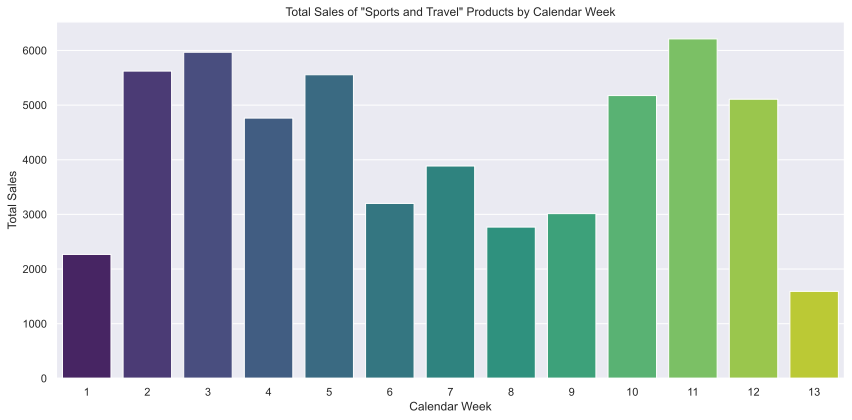

In [10]:
### plot a chart with total sales ('Total') of the "Sports and travel" products by calendar week (Monday-Sunday): 
### note the first and the last week can be incomplete (for instance, the data starts on Wednesday, and ends on Friday)
### assume all our sales data spans the same year (for instance, 2019)

### you can make use of the isocalendar() function: https://www.geeksforgeeks.org/isocalendar-function-of-datetime-date-class-in-python/

### x axis are weeks enumerated from the first to the last calendar week in the data
### y axis is the total sales that week


# Convert the 'Date' column to calendar week number (ISO standard: Monday–Sunday)
df['calendar week'] = pd.to_datetime(df['Date']).dt.isocalendar().week.astype(int)

# Filter the data to include only "Sports and travel" product line
sports_and_travel_sales = df[df['Product line'] == 'Sports and travel']

# Group total sales by calendar week
q7_result = sports_and_travel_sales.groupby('calendar week')['Total'].sum().reset_index()

# Ensure all calendar weeks are included, even if some weeks had no sales
all_weeks = pd.DataFrame({'calendar week': range(q7_result['calendar week'].min(), q7_result['calendar week'].max() + 1)})
q7_result = pd.merge(all_weeks, q7_result, on='calendar week', how='left').fillna(0)

# Plot a bar chart showing total weekly sales
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=q7_result, x='calendar week', y='Total', palette='viridis')

# Set chart title and axis labels
ax.set_title('Total Sales of "Sports and Travel" Products by Calendar Week')
ax.set_xlabel('Calendar Week')
ax.set_ylabel('Total Sales')

# Adjust layout to prevent label clipping
plt.tight_layout()
plt.show()



#### Question 8

c:\Users\USER001\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER001\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


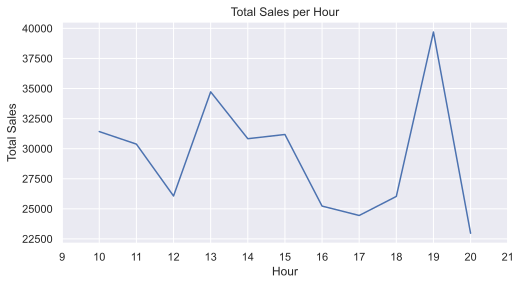

In [11]:
### plot a line chart of total sales ('Total') per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total amout of sales during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)

# Add a column for the hour of the sale
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour.astype('int')

# Group data by hour and sum the Total sales
q8_result = df.groupby('Hour')['Total'].sum().reset_index()

# Plot a line chart for total sales per hour
ax = sns.lineplot(data=q8_result, x='Hour', y='Total')
plt.title('Total Sales per Hour')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.xticks(range(9, 22))
plt.show()

#### Question 9

c:\Users\USER001\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER001\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


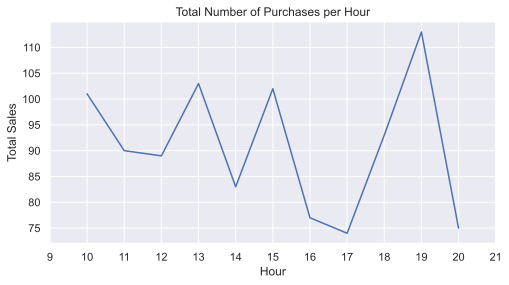

In [12]:
### plot a line chart of the total number of purchases (rows) per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total number of purchases during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)

# Group data by hour and count the number of purchases
q9_result = df.groupby('Hour').count().reset_index()

# Plot a line chart for the total number of purchases per hour
ax = sns.lineplot(data=q9_result, x='Hour', y='Total')
plt.title('Total Number of Purchases per Hour')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.xticks(range(9, 22))
plt.show()


#### Question 10

In [13]:
### what is the total income of strategic products by City?

### for each non-strategic product (as detailed in the product_types_strategy.csv file), 
###    display break down of total sales by cities - a table with three columns: 
###    (1) product line, (2) city and (3) total sales (the "Total" column) for that line in the city

# Load the product types strategy file
product_types_df = pd.read_csv("product_types_strategy.csv")

# Rename columns and map strategic values to boolean
product_types_df = product_types_df.rename(columns={'Product type': 'Product line'})
product_types_df['strategic'] = product_types_df['strategic'].map({'yes': True, 'no': False})

# Merge the product types data with the main dataset
merged_df = pd.merge(df, product_types_df)

# Filter non-strategic products and group by Product line and City
q10_result = merged_df[~merged_df['strategic']].groupby(['Product line', 'City'])['Total'].sum().reset_index()

pd.DataFrame(q10_result)

,Product line,City,Total
0,Fashion accessories,Mandalay,16413.3165
1,Fashion accessories,Naypyitaw,21560.0700
2,Fashion accessories,Yangon,16332.5085
3,Home and lifestyle,Mandalay,17549.1645
4,Home and lifestyle,Naypyitaw,13895.5530
5,Home and lifestyle,Yangon,22417.1955
